# Using Predictive Analysis To Predict Diagnosis of a Breast 

1.2 Objective
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

Identify data sources
The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

In [2]:
import pandas as pd 
import numpy as np         # linear algebra

wdbc_data = pd.read_csv('breast-cancer-wisconsin_wdbc.csv',sep=',')
wdbc_data.head()

,%id,diagnosis (M=malignant; B=benign),radius (nucA),texture (nucA),perimeter (nucA),area (nucA),smoothness (nucA),compactness (nucA),concavity (nucA),concave points (nucA),...,radius (nucC),texture (nucC),perimeter (nucC),area (nucC),smoothness (nucC),compactness (nucC),concavity (nucC),concave points (nucC),symmetry (nucC),fractal dimension (nucC)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
wdbc_data.drop('%id', axis = 1 , inplace= True)

In [25]:
wdbc_data.rename(columns= {'diagnosis (M=malignant; B=benign)' : 'diagnosis'} ,inplace=True)

In [26]:
wdbc_data.columns

Index(['diagnosis', 'radius (nucA)', 'texture (nucA)', 'perimeter (nucA)',
       'area (nucA)', 'smoothness (nucA)', 'compactness (nucA)',
       'concavity (nucA)', 'concave points (nucA)', 'symmetry (nucA)',
       'fractal dimension (nucA)', 'radius (nucB)', 'texture (nucB)',
       'perimeter (nucB)', 'area (nucB)', 'smoothness (nucB)',
       'compactness (nucB)', 'concavity (nucB)', 'concave points (nucB)',
       'symmetry (nucB)', 'fractal dimension (nucB)', 'radius (nucC)',
       'texture (nucC)', 'perimeter (nucC)', 'area (nucC)',
       'smoothness (nucC)', 'compactness (nucC)', 'concavity (nucC)',
       'concave points (nucC)', 'symmetry (nucC)', 'fractal dimension (nucC)'],
      dtype='object')

In [27]:
wdbc_data.shape

(569, 31)

In [28]:
wdbc_data.get_dtype_counts()

object      1
float64    30
dtype: int64

In [29]:
wdbc_data.isnull().any()

diagnosis                   False
radius (nucA)               False
texture (nucA)              False
perimeter (nucA)            False
area (nucA)                 False
smoothness (nucA)           False
compactness (nucA)          False
concavity (nucA)            False
concave points (nucA)       False
symmetry (nucA)             False
fractal dimension (nucA)    False
radius (nucB)               False
texture (nucB)              False
perimeter (nucB)            False
area (nucB)                 False
smoothness (nucB)           False
compactness (nucB)          False
concavity (nucB)            False
concave points (nucB)       False
symmetry (nucB)             False
fractal dimension (nucB)    False
radius (nucC)               False
texture (nucC)              False
perimeter (nucC)            False
area (nucC)                 False
smoothness (nucC)           False
compactness (nucC)          False
concavity (nucC)            False
concave points (nucC)       False
symmetry (nucC

In [31]:
wdbc_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [32]:
wdbc_data.to_csv('clean-data.csv')


Exploratory Data Analysis
Descriptive statistics is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

Visualization is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

# 2.2 Descriptive statistics¶


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [36]:
data = pd.read_csv('clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head(2)

,diagnosis,radius (nucA),texture (nucA),perimeter (nucA),area (nucA),smoothness (nucA),compactness (nucA),concavity (nucA),concave points (nucA),symmetry (nucA),...,radius (nucC),texture (nucC),perimeter (nucC),area (nucC),smoothness (nucC),compactness (nucC),concavity (nucC),concave points (nucC),symmetry (nucC),fractal dimension (nucC)
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [37]:
#basic descriptive statistics
data.describe()

,radius (nucA),texture (nucA),perimeter (nucA),area (nucA),smoothness (nucA),compactness (nucA),concavity (nucA),concave points (nucA),symmetry (nucA),fractal dimension (nucA),...,radius (nucC),texture (nucC),perimeter (nucC),area (nucC),smoothness (nucC),compactness (nucC),concavity (nucC),concave points (nucC),symmetry (nucC),fractal dimension (nucC)
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [39]:
data.skew()

radius (nucA)               0.942380
texture (nucA)              0.650450
perimeter (nucA)            0.990650
area (nucA)                 1.645732
smoothness (nucA)           0.456324
compactness (nucA)          1.190123
concavity (nucA)            1.401180
concave points (nucA)       1.171180
symmetry (nucA)             0.725609
fractal dimension (nucA)    1.304489
radius (nucB)               3.088612
texture (nucB)              1.646444
perimeter (nucB)            3.443615
area (nucB)                 5.447186
smoothness (nucB)           2.314450
compactness (nucB)          1.902221
concavity (nucB)            5.110463
concave points (nucB)       1.444678
symmetry (nucB)             2.195133
fractal dimension (nucB)    3.923969
radius (nucC)               1.103115
texture (nucC)              0.498321
perimeter (nucC)            1.128164
area (nucC)                 1.859373
smoothness (nucC)           0.415426
compactness (nucC)          1.473555
concavity (nucC)            1.150237
c

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.



In [44]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


In [45]:
diag_gr.size()

diagnosis
B    357
M    212
dtype: int64

Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where

Malignant = 1 (indicates prescence of cancer cells)
Benign = 0 (indicates abscence)
Observation
357 observations indicating the absence of cancer cells and 212 show absence of cancer cell



# Unimodal Data Visualizations


One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that you can use to understand each attribute of your dataset independently.

Histograms.
Density Plots.
Box and Whisker Plots.

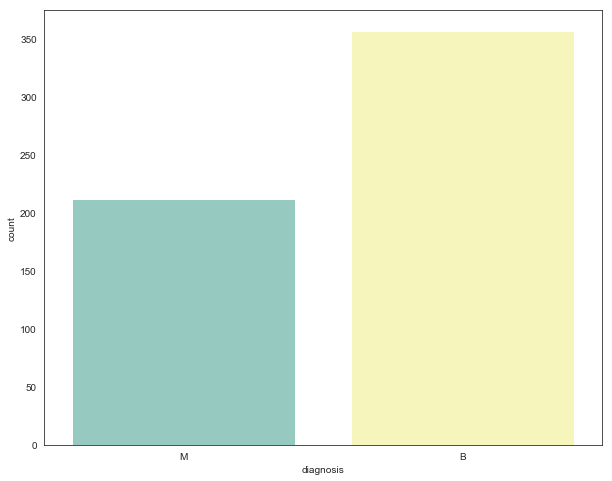

In [49]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

In [60]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,
# and __worst) to perform visualisation plots off. 
#Join the 'ID' and 'Diagnosis' back on
data_id_diag=data.loc[:,["id","diagnosis"]]
data_diag=data.loc[:,["diagnosis"]]

#For a merge + slice:
data_mean=data.ix[:,1:11]
data_se=data.ix[:,11:22]
data_worst=data.ix[:,23:]

print(data_id_diag.columns,'\n')
print(data_mean.columns,'\n')
print(data_se.columns,'\n')
print(data_worst.columns,'\n')

Index(['id', 'diagnosis'], dtype='object') 

Index(['radius (nucA)', 'texture (nucA)', 'perimeter (nucA)', 'area (nucA)',
       'smoothness (nucA)', 'compactness (nucA)', 'concavity (nucA)',
       'concave points (nucA)', 'symmetry (nucA)', 'fractal dimension (nucA)'],
      dtype='object') 

Index(['radius (nucB)', 'texture (nucB)', 'perimeter (nucB)', 'area (nucB)',
       'smoothness (nucB)', 'compactness (nucB)', 'concavity (nucB)',
       'concave points (nucB)', 'symmetry (nucB)', 'fractal dimension (nucB)',
       'radius (nucC)'],
      dtype='object') 

Index(['perimeter (nucC)', 'area (nucC)', 'smoothness (nucC)',
       'compactness (nucC)', 'concavity (nucC)', 'concave points (nucC)',
       'symmetry (nucC)', 'fractal dimension (nucC)'],
      dtype='object') 



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp

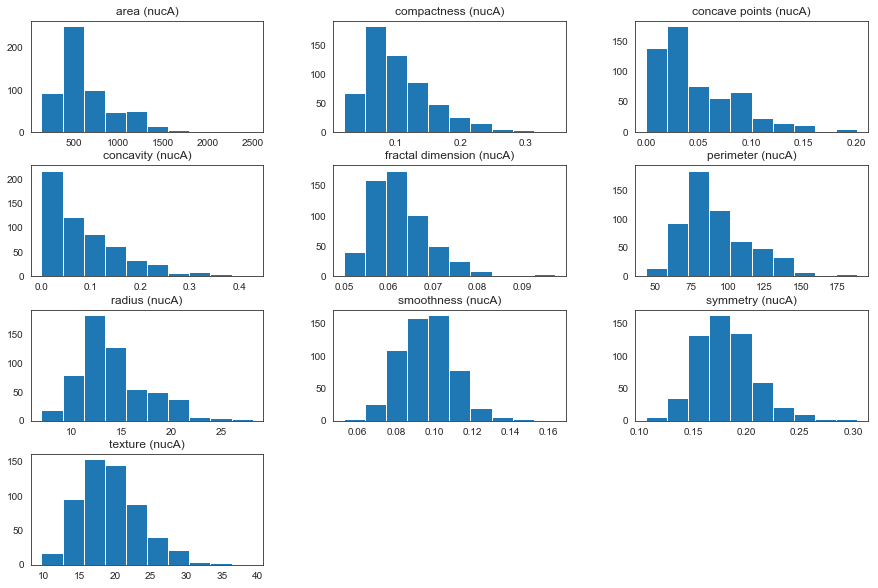

In [56]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

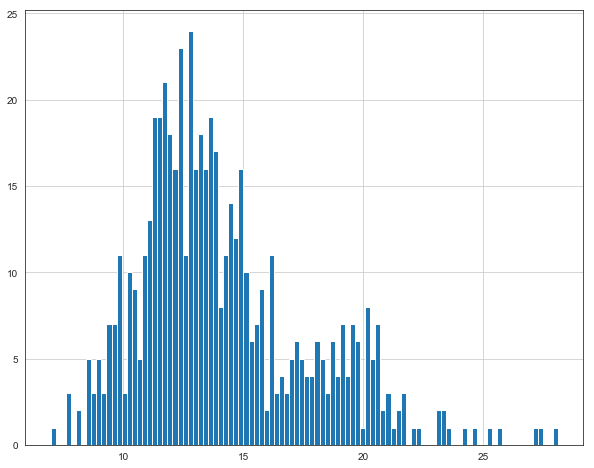

In [66]:
#Any individual histograms, use this:
df_cut = data_mean['radius (nucA)'].hist(bins=100)

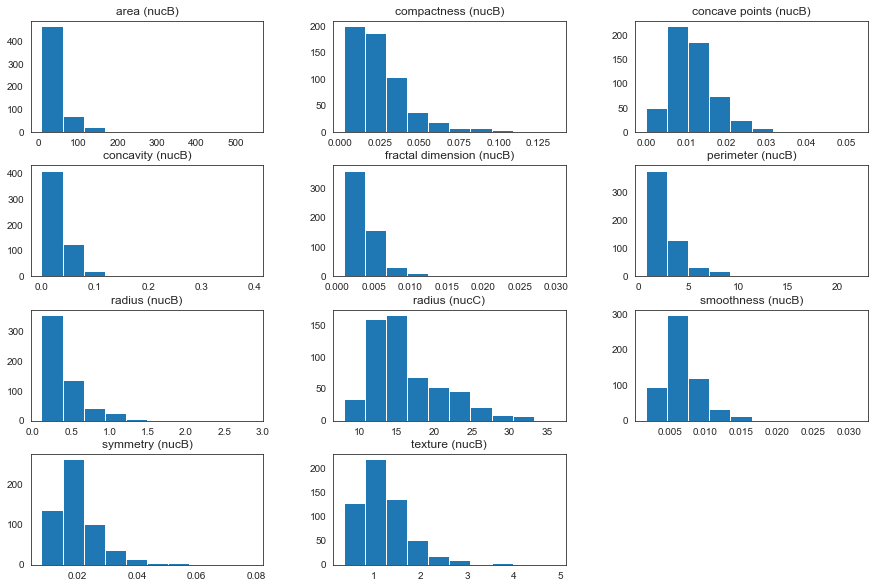

In [67]:
#Plot histograms of _se variables
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)